In [1]:
import matplotlib.pyplot as plt

In [2]:
def get_ellipse_points(x, y, h, k):
    return [(h + x, k + y), (h - x, k + y), (h + x, k - y), (h - x, k - y)]

In [3]:
def draw_midpoint_ellipse(a, b, h, k):
    a2 = a * a
    b2 = b * b

    x = 0
    y = b
    points = []

    # Region 1
    p1 = b2 - (a2 * b) + (0.25 * a2)
    dx = 2 * b2 * x
    dy = 2 * a2 * y

    while dx <= dy:
        points.extend(get_ellipse_points(x, y, h, k))
        x += 1
        dx = 2 * b2 * x
        if p1 < 0:
            p1 += dx + b2
        else:
            y -= 1
            dy = 2 * a2 * y
            p1 += dx - dy + b2

    # Region 2
    p2 = (b2 * (x + 0.5) ** 2) + (a2 * (y - 1) ** 2) - (a2 * b2)
    while y >= 0:
        points.extend(get_ellipse_points(x, y, h, k))
        y -= 1
        dy = 2 * a2 * y
        if p2 > 0:
            p2 -= dy + a2
        else:
            x += 1
            dx = 2 * b2 * x
            p2 += dx - dy + a2

    return points

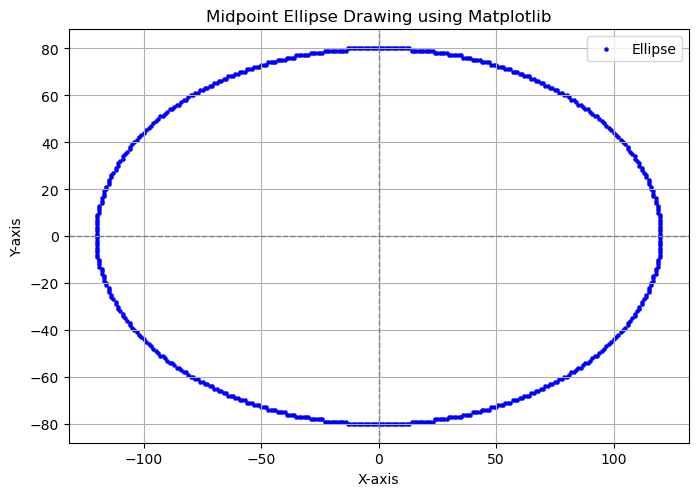

In [5]:
try:
    center_x = int(input("Enter center X-coordinate: "))
    center_y = int(input("Enter center Y-coordinate: "))
    major_axis = int(input("Enter length of semi-major axis (a): "))
    minor_axis = int(input("Enter length of semi-minor axis (b): "))

    points = draw_midpoint_ellipse(major_axis, minor_axis, center_x, center_y)
    x_vals, y_vals = zip(*points)

    # Plotting with Matplotlib
    plt.figure(figsize=(8, 6))
    plt.scatter(x_vals, y_vals, s=5, color='blue', label='Ellipse')

    # Draw axes
    plt.axhline(y=center_y, color='gray', linestyle='--', linewidth=1)  # X-axis
    plt.axvline(x=center_x, color='gray', linestyle='--', linewidth=1)  # Y-axis

    plt.title("Midpoint Ellipse Drawing using Matplotlib")
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.legend()
    plt.show()

except ValueError:
    print("Invalid input. Please enter integer values.")